In [1]:
def matriz_vector(A,x,b,N):
    for i in range(N):
        temp = 0.0
        for j in range(N):
            temp = temp + A[i*N+j]*x[j]
        b[i] = temp

In [2]:
%%file lib_matriz_vector.c
void matriz_vector(double *A, double *x, double *b, int N)
{
    double temp;
    for(int i = 0; i<N; i++)
    {
        temp = 0.0;
        for (int j = 0;j<N;j++)
        {
            temp = temp + A[i*N+j]*x[j];
        }
        b[i] = temp;
    }
}

Writing lib_matriz_vector.c


In [3]:
! gcc -fPIC -shared lib_matriz_vector.c -o lib_matriz_vector.so

<function matplotlib.pyplot.show(close=None, block=None)>

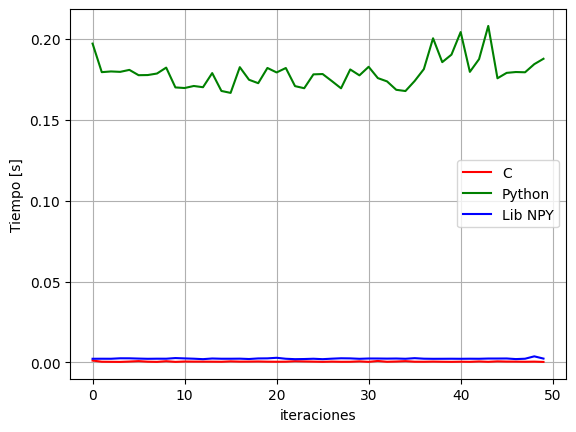

In [4]:
import numpy as np
import ctypes
import time
import matplotlib.pyplot as plt

lib = ctypes.CDLL('./lib_matriz_vector.so')
lib.matriz_vector.argtypes = [np.ctypeslib.ndpointer(dtype = np.double),np.ctypeslib.ndpointer(dtype = np.double),np.ctypeslib.ndpointer(dtype = np.double), ctypes.c_int]

iter = 50
lista_np = []
lista_py = []
lista_c = []
for _ in range(iter):
    N = 1024
    A = np.random.rand(N*N)
    M = np.reshape(A, [N,N])

    x = np.random.rand(N)
    b_py = np.zeros_like(x)
    b_c = np.zeros_like(x)
    
    tic = time.perf_counter()
    M.dot(x)
    toc = time.perf_counter()
    lista_np.append(toc-tic)
    
    tic = time.perf_counter()
    matriz_vector(A,x,b_py,N)
    toc = time.perf_counter()
    lista_py.append(toc-tic)
    
    tic = time.perf_counter()
    lib.matriz_vector(A,x, b_c, N)
    toc = time.perf_counter()
    lista_c.append(toc-tic)

plt.plot(lista_np,'r')
plt.plot(lista_py,'g')
plt.plot(lista_c,'b')
plt.xlabel("iteraciones")
plt.ylabel("Tiempo [s]")
plt.legend({"Lib NPY","Python","C"})
plt.grid()
plt.show

In [15]:
import numpy as np
import ctypes
import time
import matplotlib.pyplot as plt
import statistics

lib = ctypes.CDLL('./lib_matriz_vector.so')
lib.matriz_vector.argtypes = [np.ctypeslib.ndpointer(dtype = np.double),np.ctypeslib.ndpointer(dtype = np.double),np.ctypeslib.ndpointer(dtype = np.double), ctypes.c_int]

lista_N = [256, 512, 1024, 2048, 4096, 8192] 

lista_N_lib = []
lista_N_py = []
lista_N_C = []

for N in lista_N:
    iter = 30
    lista_np = []
    lista_py = []
    lista_c = []
    for _ in range(iter):
        A = np.random.rand(N*N)
        M = np.reshape(A, [N,N])

        x = np.random.rand(N)
        b_py = np.zeros_like(x)
        b_c = np.zeros_like(x)
        
        tic = time.perf_counter()
        M.dot(x)
        toc = time.perf_counter()
        lista_np.append(toc-tic)
        
        tic = time.perf_counter()
        matriz_vector(A,x,b_py,N)
        toc = time.perf_counter()
        lista_py.append(toc-tic)
        
        tic = time.perf_counter()
        lib.matriz_vector(A,x, b_c, N)
        toc = time.perf_counter()
        lista_c.append(toc-tic)
    lista_N_lib.append(statistics.median(lista_np))
    lista_N_py.append(statistics.median(lista_py))
    lista_N_C.append(statistics.median(lista_c))

plt.plot(lista_N_lib,'r')
plt.plot(lista_N_py,'g')
plt.plot(lista_N_C,'b')
plt.xlabel("Tamaño [N]")
plt.ylabel("Tiempo [s]")
plt.legend({"Lib NPY","Python","C"})
plt.grid()
plt.show

In [1]:
import random

# Crear una matriz de 3x3 en Python con valores aleatorios
matriz_py = [[random.randint(1, 100) for _ in range(3)] for _ in range(3)]

# Imprimir la matriz
print("Matriz en Python con valores aleatorios:")
for fila in matriz_py:
    print(fila)
    

Matriz en Python con valores aleatorios:
[25, 25, 24]
[4, 43, 91]
[75, 77, 52]


In [2]:
import numpy as np

# Crear una matriz de 3x3 en Python con valores aleatorios utilizando NumPy
matriz_py = np.random.randint(1, 100, size=(3, 3))

# Imprimir la matriz
print("Matriz en Python con valores aleatorios utilizando NumPy:")
print(matriz_py)


Matriz en Python con valores aleatorios utilizando NumPy:
[[76  2  3]
 [97 76 10]
 [68 92 66]]


In [ ]:
#include <stdio.h>
#include <stdlib.h>
#include <time.h>
#define FILAS 3
#define COLUMNAS 3

int main() {
    // Semilla para la generación de números aleatorios
    srand(time(NULL));

    // Crear una matriz de 3x3 en C con valores aleatorios
    int matriz_c[FILAS][COLUMNAS];
    for (int i = 0; i < FILAS; i++) {
        for (int j = 0; j < COLUMNAS; j++) {
            matriz_c[i][j] = rand() % 100 + 1; // Generar números aleatorios entre 1 y 100
        }
    }

    // Imprimir la matriz
    printf("Matriz en C con valores aleatorios:\n");
    for (int i = 0; i < FILAS; i++) {
        for (int j = 0; j < COLUMNAS; j++) {
            printf("%d ", matriz_c[i][j]);
        }
        printf("\n");
    }

    return 0;
}